## Apa itu Apache Spark
Apache Spark adalah teknologi komputasi cluster, dirancang untuk melakukan komputasi dengan cepat. Ini dibuat diatas pada Hadoop MapReduce dan memperluas model MapReduce secara efisien untuk dapat melakukan lebih banyak jenis komputasi, yang mencakup queri interaktif dan pemrosesan realtime data.

Apache Spark ditulis menggunakan bahasa pemrograman [Scala](https://scala-lang.org/).

## Apa itu PySpark
Pyspark adalah koneksi antara Apache Spark dan Python. Ini adalah API Spark Python dan membantu kita terhubung dengan Resilient Distributed Datasets (RDDs) ke Apache Spark dan Python. PySpark adalah Python API untuk Spark yang dirilis oleh komunitas Apache Spark untuk mendukung Python dengan Spark

## Apache Spark menggunakan Scala vs PySpark
| Kriteria | PySpark | Scala |
| :-- | :-- | :-- |
| Performance Speed | Python relatif lebih lambat daripada Scala saat digunakan dengan Spark, tetapi programmer dapat melakukan lebih banyak hal dengan Python daripada dengan Scala karena Python menyediakan antarmuka yang lebih mudah | Spark ditulis dalam Scala, sehingga terintegrasi dengan baik dengan Scala. Ini lebih cepat dari Python |
| Learning Curve | Python dikenal karena sintaksnya yang mudah dan merupakan bahasa tingkat tinggi yang lebih mudah dipelajari. Ini juga sangat produktif bahkan dengan sintaks yang sederhana | Scala memiliki syntax mirip dengan Java, setiap kali melakukan pekerjaan kita harus melakukan compile, install dependencies menggunakan sbt atau maven, dll |
| Readability of Code | Readability, maintenance, dan familiarity dari code lebih baik di Python | Di Scala API, mudah untuk membuat perubahan internal karena Spark ditulis dalam Scala, kemungkinan versi Spark dengan Scala lebih update |
| Complexity | Python dikenal sebagai bahasa pemrograman yang simple | Scala termasuk bahasa pemrograman yang cukup complex |
| Machine Learning Libraries | Python lebih disukai untuk mengimplementasikan algoritma Machine Learning | Dukungan untuk Machine Learning dan Data Science tidak sebaik Python |


## Instalations

### MacOS
- [Install Pyspark on Windows, Mac & Linux](https://www.datacamp.com/tutorial/installation-of-pyspark#mac-installation)
- [How to Install and Use Homebrew](https://www.datacamp.com/tutorial/homebrew-install-use)
- [Install Apache Spark on macOS](https://notadatascientist.com/install-spark-on-macos/)

### Windows
[Install Pyspark on Windows, Mac & Linux](https://www.datacamp.com/tutorial/installation-of-pyspark#windows-installation)

### Docker
[jupyter/pyspark-notebook - Docker Image](https://hub.docker.com/r/jupyter/pyspark-notebook/)

### Conda
[Install PySpark in Anaconda & Jupyter Notebook](https://sparkbyexamples.com/pyspark/install-pyspark-in-anaconda-jupyter-notebook/) - <b>Tested and Works</b>

### Alternative
[Apache Spark in Python with PySpark](https://www.datacamp.com/tutorial/apache-spark-python#How-to-Install-Spark)


## Cluster Manager Types
Saat menulis tutorial Spark dengan Python (PySpark), Spark mendukung cluster di bawah ini:

- Standalone – cluster manager sederhana yang disertakan dengan Spark yang memudahkan pengaturan cluster.
- Apache Mesos – Mesos adalah Cluster manager yang juga dapat menjalankan aplikasi Hadoop MapReduce dan PySpark.
- Hadoop YARN – Resource manager di Hadoop 2. Ini adalah manager cluster yang sering digunakan.
- Kubernetes – Open source system untuk mengotomatiskan deployment, scaling, dan pengelolaan aplikasi dalam container.

local – yang sebenarnya bukan cluster manager tetapi karena kita akan menggunakan "lokal" untuk master() untuk menjalankan Spark di laptop/komputer kita.

## Membuat Spark Session

SparkSession adalah titik masuk ke semua fungsionalitas di Spark, dan diperlukan jika kita ingin membangun kerangka data di PySpark. Jalankan baris kode berikut untuk menginisialisasi SparkSession:

In [2]:
from pyspark.sql.session import SparkSession

In [3]:
spark_session = (
    SparkSession
    .builder
    .appName('Spark Intro')
    .getOrCreate()
)

22/10/29 11:57:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [6]:
spark_session

## Membuat Spark Context
SparkContext adalah klien dari lingkungan eksekusi Spark dan bertindak sebagai master aplikasi Spark. SparkContext menyiapkan layanan internal dan membuat koneksi ke lingkungan eksekusi Spark. 

Kita dapat membuat RDD, akumulator, dan variabel, mengakses layanan Spark dan menjalankan pekerjaan (hingga SparkContext berhenti) setelah pembuatan SparkContext. Hanya satu SparkContext yang dapat aktif per JVM. Kita harus menghentikan () SparkContext yang aktif sebelum membuat yang baru.

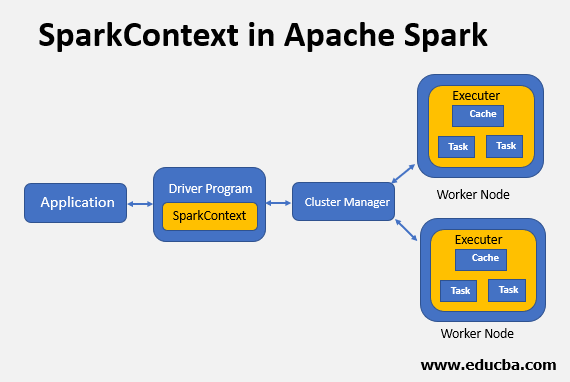

In [9]:
sc = spark_session.sparkContext
sc

<SparkContext master=local[*] appName=Spark Intro>

## RDD (Resilient Distributed Datasets)

<img src="src/images/RDD.png" width="500">

- Resilient: Ability to withstand failures 
- Distributed: Spanning across multiple machines 
- Datasets: Collection of partitioned data e.g, Arrays, Tables, Tuples etc

In [12]:
numRDD = sc.parallelize([1,2,3,4,5])
helloRDD = sc.parallelize("Hello world")

In [13]:
type(helloRDD)

pyspark.rdd.RDD

In [14]:
print(helloRDD)

ParallelCollectionRDD[3] at readRDDFromFile at PythonRDD.scala:274


In [18]:
helloRDD.collect()

['H', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd']

In [19]:
dept = [("Finance",10), ("Marketing",20), ("Sales",30), ("IT",40)]
deptRDD = sc.parallelize(dept)
dataColl=deptRDD.collect()
for row in dataColl:
    print(row[0] + "," +str(row[1]))

Finance,10
Marketing,20
Sales,30
IT,40


### Understanding Partitioning in PySpark

In [21]:
helloRDD.getNumPartitions()

4

Secara default, Spark akan membagi data ke dalam 4 partition

In [26]:
numRDD = sc.parallelize([1,2,3,4,5], 5)
numRDD.getNumPartitions()

5

Kita dapat mengubah jumlah partition dengan menambahkan parameter sewaktu membuat RDD

## PySpark Operations
<img src="src/images/spark-opeations.png" width="500">

- Transformations create new RDDS 
- Actions perform computation on the RDDs

## RDD Transformations

- Transformations merupakan suatu Lazy evaluation (berarti eksekusi tidak akan dimulai sampai tindakan dipicu)

<img src="src/images/rdd-transformation.png" width="500">

- Basic RDD Transformations adalah map() , filter() , flatMap() , and union()

### map() Transformation
transformasi map() menerapkan fungsi ke semua elemen di RDD

<img src="src/images/map.png" width="500">

In [30]:
RDD = sc.parallelize([1,2,3,4]) 
RDD_map = RDD.map(lambda x: x * x)
RDD_map.collect()

[1, 4, 9, 16]

### filter() Transformation
Transformasi filter mengembalikan RDD baru dengan hanya elemen yang sesuai dengan kondisi tertentu

<img src="src/images/filter.png" width="500">

In [31]:
RDD = sc.parallelize([1,2,3,4]) 
RDD_filter = RDD.filter(lambda x: x > 2)
RDD_filter.collect()

[3, 4]

### flatMap() Transformation
transformasi flatMap() mengembalikan beberapa nilai untuk setiap elemen dalam RDD asli

<img src="src/images/flatmap.png" width="500">

In [33]:
RDD = sc.parallelize(["hello world", "how are you"]) 
RDD_flatmap = RDD.flatMap(lambda x: x.split(" "))
RDD_flatmap.collect()

['hello', 'world', 'how', 'are', 'you']

### union() Transformation

In [34]:
RDD_1 = sc.parallelize([1,2,3,4]) 
RDD_2 = sc.parallelize([5,6,7,8]) 
combinedRDD = RDD_1.union(RDD_2)
combinedRDD.collect()

[1, 2, 3, 4, 5, 6, 7, 8]

## RDD Actions 
- Operasi ini mengembalikan sebuah nilai setelah kita menjalankan komputasi pada RDD 
- Basic RDD Actions antara lain: collect() take(N) ,first() count()

### collect() and take() Actions
- collect() mengembalikan semua elemen dataset sebagai array 
- take(N) mengembalikan array dengan elemen N pertama dari dataset

In [35]:
RDD_map.collect()

[1, 4, 9, 16]

In [36]:
RDD_map.take(2)

[1, 4]

### first() and count() Actions
- first() mencetak elemen pertama dari RDD
- count() mengembalikan jumlah elemen dalam RDD

In [37]:
RDD_map.first()

1

In [38]:
RDD_flatmap.count()

5

### reduce() 
digunakan untuk menggabungkan elemen-elemen dari RDD. 

In [51]:
x = [1,3,4,6] 
RDD = sc.parallelize(x) 
RDD.reduce(lambda x, y : x + y)

14

## Pair RDDs in PySpark
- Kumpulan data sebenarnya biasanya merupakan pasangan key/value.
- Setiap baris adalah key dan memetakan ke satu atau lebih value.
- Pair RDD: Key-nya adalah identifier, dan value-nya adalah data

In [40]:
my_tuple = [('Sam', 23), ('Mary', 34), ('Peter', 25)] 
pairRDD_tuple = sc.parallelize(my_tuple)
pairRDD_tuple.collect()

[('Sam', 23), ('Mary', 34), ('Peter', 25)]

In [41]:
my_list = ['Sam 23', 'Mary 34', 'Peter 25'] 
regularRDD = sc.parallelize(my_list) 
pairRDD_RDD = regularRDD.map(lambda s: (s.split(' ')[0], s.split(' ')[1]))
pairRDD_RDD.collect()

[('Sam', '23'), ('Mary', '34'), ('Peter', '25')]

## Transformations on pair RDDs
Semua transformasi sebelumnya yang telah dibahas dapat digunakan pada pasangan RDD. Bedanya adalah transformasi harus dapat melewati fungsi yang beroperasi pada pasangan key/value daripada pada elemen individu.

Contoh Transformasi pada Pair RDD.
- reduceByKey(func): Gabungkan nilai dengan key yang sama.
- groupByKey(): Mengelompokkan nilai dengan key yang sama.
- sortByKey(): Mengembalikan RDD yang diurutkan berdasarkan key.
- join(): Join dengan dua pasangan RDD berdasarkan key-nya

### reduceByKey() transformation
- transformasi reduceByKey() menggabungkan value dengan key yang sama.
- Ini menjalankan operasi paralel untuk setiap key dalam dataset.

In [43]:
regularRDD = sc.parallelize([("Messi", 23), ("Ronaldo", 34), ("Neymar", 22), ("Messi", 24)]) 
pairRDD_reducebykey = regularRDD.reduceByKey(lambda x,y : x + y) 
pairRDD_reducebykey.collect()

[('Neymar', 22), ('Ronaldo', 34), ('Messi', 47)]

### sortByKey() transformation
- sortByKey() perintah operasi memasangkan RDD dengan key .
- Ini mengembalikan RDD yang diurutkan berdasarkan key dalam urutan naik atau turun

In [45]:
pairRDD_reducebykey_rev = pairRDD_reducebykey.map(lambda x: (x[1], x[0])) 
pairRDD_reducebykey_rev.sortByKey(ascending=False).collect()

[(47, 'Messi'), (34, 'Ronaldo'), (22, 'Neymar')]

### groupByKey() transformation
mengelompokkan semua nilai dengan key yang sama dalam pasangan RDD

In [46]:
airports = [("US", "JFK"),("UK", "LHR"),("FR", "CDG"),("US", "SFO")] 
regularRDD = sc.parallelize(airports) 
pairRDD_group = regularRDD.groupByKey().collect() 
for cont, air in pairRDD_group: 
    print(cont, list(air))

US ['JFK', 'SFO']
FR ['CDG']
UK ['LHR']


### join() transformation
transformasi yang menggabungkan dua pasangan RDD berdasarkan key-nya

In [48]:
RDD1 = sc.parallelize([("Messi", 34),("Ronaldo", 32),("Neymar", 24)]) 
RDD2 = sc.parallelize([("Ronaldo", 80),("Neymar", 120),("Messi", 100)])
RDD1.join(RDD2).collect()

[('Ronaldo', (32, 80)), ('Neymar', (24, 120)), ('Messi', (34, 100))]

## Action Operations on pair RDDs
Beberapa contoh actions pada Pair RDD antara lain:
countByKey() collectAsMap()

### countByKey() action
menghitung jumlah elemen untuk setiap key

In [52]:
rdd = sc.parallelize([("a", 1), ("b", 1), ("a", 1)]) 
for key, val in rdd.countByKey().items(): 
    print(key, val)

a 2
b 1


### collectAsMap() action
mengembalikan pasangan key-value dalam RDD sebagai dictionary

In [53]:
sc.parallelize([(1, 2), (3, 4)]).collectAsMap()

{1: 2, 3: 4}

## PySpark Dataframe
- PySpark DataFrame adalah kumpulan data yang terdistribusi yang tidak dapat diubah (immutable).
- PySpark SQL adalah library Spark untuk structured data. Ini dapat memberikan banyak informasi tentang struktur data dan komputasi. 
- Dirancang untuk memproses baik data terstruktur (misalnya database relasional) dan data semi-terstruktur (misalnya JSON)
- Dataframe API tersedia di Python, R , Scala, dan Java.
- DataFrames di PySpark mendukung query SQL ( SELECT * from table ) atau metode ekspresi ( df.select() )

## Create a DataFrame from RDD

In [55]:
iphones_RDD = sc.parallelize([("XS", 2018, 5.65, 2.79, 6.24), 
                              ("XR", 2018, 5.94, 2.98, 6.84), 
                              ("X10", 2017, 5.65, 2.79, 6.13), 
                              ("8Plus", 2017, 6.23, 3.07, 7.12) 
                             ])

names = ['Model', 'Year', 'Height', 'Width', 'Weight']

iphones_df = spark_session.createDataFrame(iphones_RDD, schema=names) 
type(iphones_df)

pyspark.sql.dataframe.DataFrame

In [56]:
iphones_df.show()

+-----+----+------+-----+------+
|Model|Year|Height|Width|Weight|
+-----+----+------+-----+------+
|   XS|2018|  5.65| 2.79|  6.24|
|   XR|2018|  5.94| 2.98|  6.84|
|  X10|2017|  5.65| 2.79|  6.13|
|8Plus|2017|  6.23| 3.07|  7.12|
+-----+----+------+-----+------+



## Create a DataFrame from reading file

### Dataset
- Flight Status Prediction:
https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022?select=Combined_Flights_2021.csv

- Dataset Medium dari Project 3 ("dataset-medium.csv")

In [66]:
import os
from pyspark.sql.types import StructType,StructField, StringType, IntegerType
os.getcwd()

'/Users/anggapradikta/Documents/spark'

In [58]:
file_csv = 'src/data/dataset-medium.csv'

In [71]:
schema = StructType() \
        .add("first_name",StringType(), True) \
        .add("last_name",StringType(),True) \
        .add("email",StringType(),True) \
        .add("alamat",StringType(),True) \
        .add("created_at",StringType(),True) 

In [72]:
df_csv = spark_session.read.csv(file_csv, schema=schema, inferSchema=True)

In [73]:
df_csv.show(5)

+----------+-----------+--------------------+--------------------+--------------------+
|first_name|  last_name|               email|              alamat|          created_at|
+----------+-----------+--------------------+--------------------+--------------------+
|     Galih| Kuswandari|  iriyanti@yahoo.com|Jl. Raya Ujungber...|2018-07-08T13:31:...|
|      Ikin|   Haryanti|   warta96@yahoo.com|Gang Asia Afrika ...|2018-07-27T07:19:...|
|     Warta|Pudjiastuti|kemalfarida@perum...|Gg. Rajawali Timu...|2018-03-19T20:19:...|
|    Rahmat|   Prasetyo|  tusada@hotmail.com|Lr. Sukajadi No. ...|2018-03-23T10:14:...|
|     Cindy|    Yolanda|candrakantasantos...|Lr. Kiaracondong ...|2018-12-11T09:31:...|
+----------+-----------+--------------------+--------------------+--------------------+
only showing top 5 rows



In [74]:
df_csv.printSchema()

root
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- email: string (nullable = true)
 |-- alamat: string (nullable = true)
 |-- created_at: string (nullable = true)



In [95]:
df_csv.describe().show()

+-------+----------+----------+--------------------+--------------------+--------------------+
|summary|first_name| last_name|               email|              alamat|          created_at|
+-------+----------+----------+--------------------+--------------------+--------------------+
|  count|    300000|    300000|              300000|              300000|              300000|
|   mean|      null|      null|                null|                null|                null|
| stddev|      null|      null|                null|                null|                null|
|    min|    Abyasa|Adriansyah|  aadriansyah@cv.edu|Gang Abdul Muis  ...|2018-01-01T00:02:...|
|    max|     Zulfa|Zulkarnain|zzulkarnain@yahoo...|Lr. W.R. Supratma...|2018-12-24T23:59:...|
+-------+----------+----------+--------------------+--------------------+--------------------+



In [75]:
file_csv_2 = 'src/data/Combined_Flights_2021.csv'
df_csv_2 = spark_session.read.csv(file_csv_2, header=True, inferSchema=True)

In [76]:
df_csv_2.count()

6311871

In [79]:
df_csv_2.printSchema()

root
 |-- FlightDate: string (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: boolean (nullable = true)
 |-- Diverted: boolean (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- DepTime: double (nullable = true)
 |-- DepDelayMinutes: double (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- ArrTime: double (nullable = true)
 |-- ArrDelayMinutes: double (nullable = true)
 |-- AirTime: double (nullable = true)
 |-- CRSElapsedTime: double (nullable = true)
 |-- ActualElapsedTime: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- Operated_or_Branded_Code_Share_Partners: string (nullable = true)


## Interacting with PySpark DataFrames
- DataFrame operations: Transformations and Actions
- DataFrame Transformations: select(), filter(), groupby(), orderby(), dropDuplicates() and withColumnRenamed()
- DataFrame Actions : printSchema(), head(), show(), count(), columns and describe()

In [80]:
# select() and show()
df_airline = df_csv_2.select('Airline')
df_airline.show(5)

+--------------------+
|             Airline|
+--------------------+
|SkyWest Airlines ...|
|SkyWest Airlines ...|
|SkyWest Airlines ...|
|SkyWest Airlines ...|
|SkyWest Airlines ...|
+--------------------+
only showing top 5 rows



In [86]:
# drop duplicates
df_airline = df_airline.dropDuplicates()
df_airline.show(5)

+--------------------+
|             Airline|
+--------------------+
|GoJet Airlines, L...|
|   Endeavor Air Inc.|
|       Allegiant Air|
|SkyWest Airlines ...|
|         Horizon Air|
+--------------------+
only showing top 5 rows



In [84]:
# filter() and show()
df_month = df_csv_2.select('Airline', 'Month').filter(df_csv_2.Month > 10)
df_month.show(5)

+--------------------+-----+
|             Airline|Month|
+--------------------+-----+
|Air Wisconsin Air...|   12|
|Air Wisconsin Air...|   12|
|Air Wisconsin Air...|   12|
|Air Wisconsin Air...|   12|
|Air Wisconsin Air...|   12|
+--------------------+-----+
only showing top 5 rows



In [87]:
# groupby() and count()
df_airportid = df_csv_2.groupby('OriginAirportID') 
df_airportid.count().show(5)

+---------------+-----+
|OriginAirportID|count|
+---------------+-----+
|          14570|20857|
|          13832|  628|
|          11630| 4678|
|          11146| 3415|
|          13795| 3162|
+---------------+-----+
only showing top 5 rows



In [88]:
# orderby()
df_airportid.count().orderBy('OriginAirportID').show(3)

+---------------+-----+
|OriginAirportID|count|
+---------------+-----+
|          10135| 5360|
|          10136| 2389|
|          10140|17891|
+---------------+-----+
only showing top 3 rows



In [92]:
# withColumnRenamed()
df_airline = df_airline.withColumnRenamed('Airline', 'airline_name')
df_airline.show()

+--------------------+
|        airline_name|
+--------------------+
|GoJet Airlines, L...|
|   Endeavor Air Inc.|
|       Allegiant Air|
|SkyWest Airlines ...|
|         Horizon Air|
|United Air Lines ...|
|Air Wisconsin Air...|
|         Comair Inc.|
|Frontier Airlines...|
|Southwest Airline...|
|     JetBlue Airways|
|Commutair Aka Cha...|
|Empire Airlines Inc.|
|           Envoy Air|
|Capital Cargo Int...|
|Hawaiian Airlines...|
|Alaska Airlines Inc.|
|Delta Air Lines Inc.|
|  Mesa Airlines Inc.|
|American Airlines...|
+--------------------+
only showing top 20 rows



In [93]:
df_airline.columns

['airline_name']

## Interacting with DataFrames using PySpark SQL

In [96]:
df_csv_2.createOrReplaceTempView("flight")

In [99]:
df2 = spark_session.sql("SELECT DISTINCT FlightDate, Airline FROM flight") 
df2.show()

+----------+--------------------+
|FlightDate|             Airline|
+----------+--------------------+
|2021-03-06|SkyWest Airlines ...|
|2021-03-21|Capital Cargo Int...|
|2021-12-25|Capital Cargo Int...|
|2021-12-29|Alaska Airlines Inc.|
|2021-12-17|     JetBlue Airways|
|2021-12-05|         Comair Inc.|
|2021-12-13|SkyWest Airlines ...|
|2021-12-26|         Horizon Air|
|2021-04-14|Delta Air Lines Inc.|
|2021-04-16|Air Wisconsin Air...|
|2021-04-10|GoJet Airlines, L...|
|2021-04-11|    Spirit Air Lines|
|2021-11-12|American Airlines...|
|2021-11-24|American Airlines...|
|2021-11-18|Capital Cargo Int...|
|2021-11-06|    Spirit Air Lines|
|2021-09-06|Delta Air Lines Inc.|
|2021-09-13|Frontier Airlines...|
|2021-09-19|       Allegiant Air|
|2021-09-30|           Envoy Air|
+----------+--------------------+
only showing top 20 rows



In [100]:
spark_session.stop()